## Martin Iniguez de Onzono, Jana Köhler and Martin Krück

# Exercise 2. MLP Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Loading our Regression data

train_set=np.loadtxt('RegressionData.txt')
num_data=len(train_set)
y_desired=train_set[:,1]

In [3]:
# Performing the weights initialization & creating the derivative function of tanh

weight_bias_10 = np.random.uniform(-0.5,0.5,3)
weight_bias_L = np.random.uniform(-0.5,0.5,1)
weights = np.random.uniform(-0.5,0.5,[3,2])

def secant_h_sqr(x):
    return 1/np.cosh(x)**2

In [4]:
# Initialization of the variables 

learn_step = 0.5

h2_values=np.zeros(num_data)
h1_values=np.zeros((3,num_data))
h0_values=train_set[:,0]

error_t=np.array([0.5,0.3])

y=[]
delta_L=1 #fL(h)=h fL'(h)=1
epoch = 0

# Backpropagation algorithm

while np.abs(error_t[-1]-error_t[-2])/error_t[-1] > 10**-5 and epoch<3000:

    gradient_bias_10 = np.zeros(3)
    gradient_bias_L = np.array([0])
    gradient_weights = np.zeros([3,2])

    for i in range(0,num_data):
        h1_values[:,i] = weights[:,0]*h0_values[i]+weight_bias_10
        h2_values[i] = np.sum(weights[:,1]*np.tanh(h1_values[:,i]))+weight_bias_L
        y=h2_values

        delta_10 = secant_h_sqr(h1_values[:,i])*weights[:,1]*delta_L
        delta_10_bias = 1*delta_L*weight_bias_L

        gradient_bias_10 = gradient_bias_10 +(y[i]-train_set[i,1])*delta_10
        gradient_bias_L = gradient_bias_L + (y[i]-train_set[i,1])*delta_L*1 # I suppose f(bias)=1 
        gradient_weights[:,1] = gradient_weights[:,1] + (y[i]-train_set[i,1])*delta_L*np.tanh(h1_values[:,i])
        gradient_weights[:,0] = gradient_weights[:,0] + (y[i]-train_set[i,1])*delta_10*h0_values[i]

    gradient_bias_10 /= num_data
    gradient_bias_L /= num_data
    gradient_weights /= num_data

    weights -= learn_step*gradient_weights
    weight_bias_10 -= learn_step*gradient_bias_10
    weight_bias_L -= learn_step*gradient_bias_L

    error_t=np.append(error_t,np.sum(1/2*(train_set[:,1]-y)**2)/num_data)
    epoch += 1

### a) Plot the error _E<sup>T</sup>_.

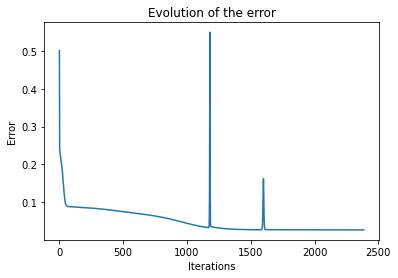

In [5]:
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.plot(error_t)
plt.title('Evolution of the error');

### b) Output of hidden units for all inputs

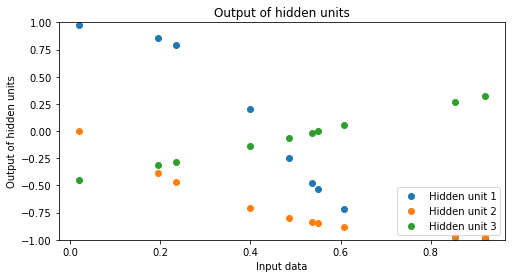

In [6]:
plt.figure(figsize=(8,4))
ax=plt.subplot(111)

s=np.array(np.tanh(h1_values).T)
num=0
for i in s.T:
    num += 1
    ax.scatter(h0_values,i,label='Hidden unit ' + str(num))
    
ax.legend(loc='lower right')
plt.ylabel('Output of hidden units')
plt.xlabel('Input data')
plt.ylim([-1,1])
plt.title('Output of hidden units');

### c) Output values and training dataset

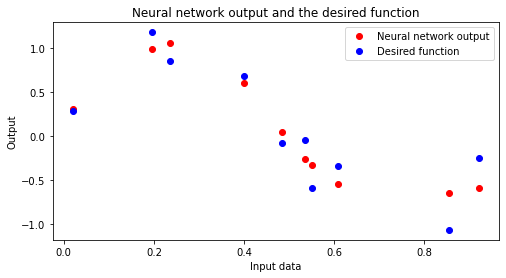

In [7]:
plt.figure(figsize=(8,4))
ax=plt.subplot(111)

plt.plot(h0_values,y,'ro',label='Neural network output')

plt.plot(h0_values,y_desired,'bo',label='Desired function')

ax.legend(loc='upper right')
plt.ylabel('Output')
plt.xlabel('Input data')
plt.title('Neural network output and the desired function');

### d) Different outputs for different initial conditions

In [8]:
# Saving the output of the previous algorithm, which was performed with a specific learning step

h1_values_1 = h1_values
error_t_1 = error_t
y_1 = y
learn_step_1 = learn_step

In [9]:
# Running the algoritm with new conditions (different learning step)

learn_step = 0.05

weight_bias_10 = np.random.uniform(-0.5,0.5,3)
weight_bias_L = np.random.uniform(-0.5,0.5,1)
weights = np.random.uniform(-0.5,0.5,[3,2])

h2_values=np.zeros(num_data)
h1_values=np.zeros((3,num_data))

error_t=np.array([0.5,0.3])
y=[]
epoch = 0

# Backpropagation algorithm for different learning step

while np.abs(error_t[-1]-error_t[-2])/error_t[-1] > 10**-5 and epoch<3000:

    gradient_bias_10 = np.zeros(3)
    gradient_bias_L = np.array([0])
    gradient_weights = np.zeros([3,2])

    for i in range(0,num_data):
        h1_values[:,i] = weights[:,0]*h0_values[i]+weight_bias_10
        h2_values[i] = np.sum(weights[:,1]*np.tanh(h1_values[:,i]))+weight_bias_L
        y=h2_values

        delta_10 = secant_h_sqr(h1_values[:,i])*weights[:,1]*delta_L
        delta_10_bias = 1*delta_L*weight_bias_L
                                  
        gradient_bias_10 = gradient_bias_10 +(y[i]-train_set[i,1])*delta_10
        gradient_bias_L = gradient_bias_L + (y[i]-train_set[i,1])*delta_L*1 # f(bias)=1 
        gradient_weights[:,1] = gradient_weights[:,1] + (y[i]-train_set[i,1])*delta_L*np.tanh(h1_values[:,i])
        gradient_weights[:,0] = gradient_weights[:,0] + (y[i]-train_set[i,1])*delta_10*h0_values[i]

    gradient_bias_10 /= num_data
    gradient_bias_L /= num_data
    gradient_weights /= num_data

    weights -= learn_step*gradient_weights
    weight_bias_10 -= learn_step*gradient_bias_10
    weight_bias_L -= learn_step*gradient_bias_L

    error_t=np.append(error_t,np.sum(1/2*(train_set[:,1]-y)**2)/num_data)
    epoch += 1

# Saving the output of the new algorithm

h1_values_2 = h1_values
error_t_2 = error_t
y_2 = y
learn_step_2 = learn_step

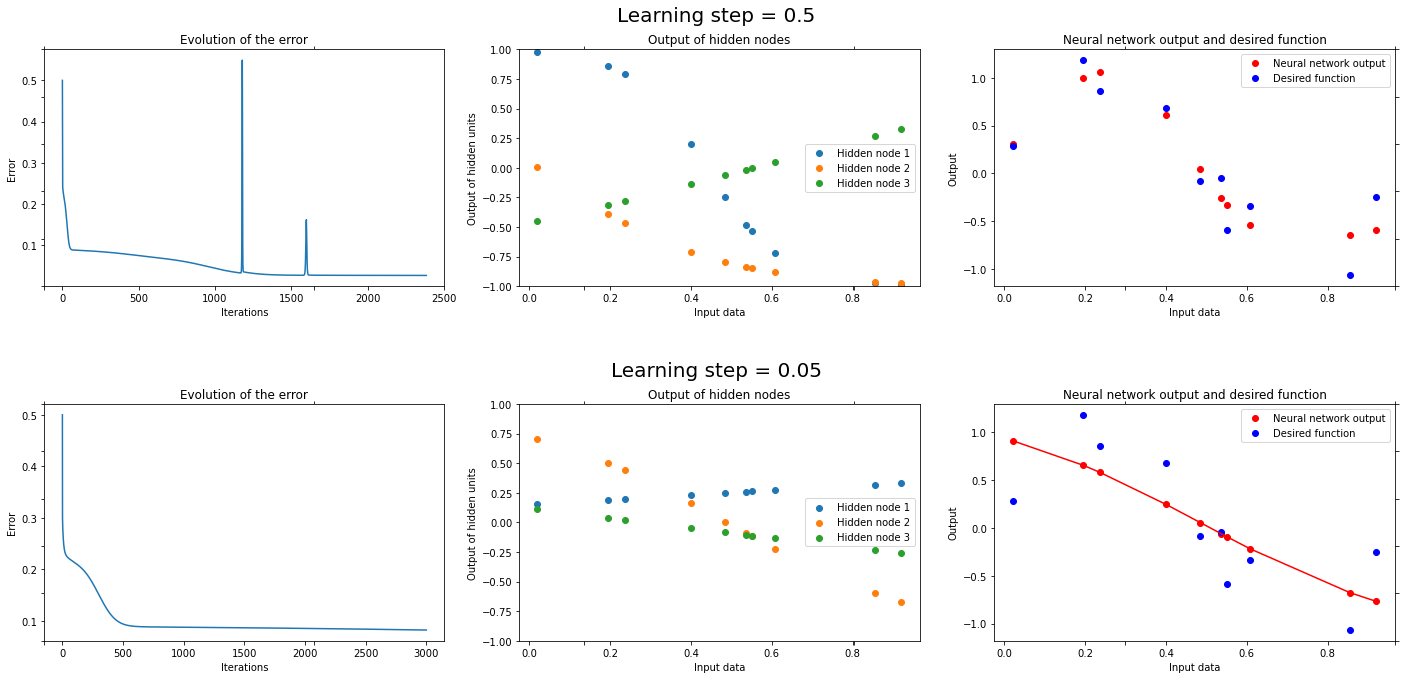

In [10]:
# Plotting the two compared output graphs from two different learning steps

fig, big_axes = plt.subplots( figsize=(20.0, 10) , nrows=2, ncols=1, sharey=True) 

total_learn_step= np.array([0,learn_step_1,learn_step_2,])

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("Learning step = %s \n" % total_learn_step[row], fontsize=20)
    
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


ax = fig.add_subplot(2,3,1)

plt.title('Evolution of the error')
plt.plot(error_t_1)
plt.ylabel('Error')
plt.xlabel('Iterations')

ax = fig.add_subplot(2,3,2)

s=np.array(np.tanh(h1_values_1).T)
num=0
for i in s.T:
    num += 1
    ax.scatter(h0_values,i,label='Hidden node ' + str(num))
ax.legend(loc='center right')
plt.ylabel('Output of hidden units')
plt.xlabel('Input data')
plt.ylim([-1,1])
plt.title('Output of hidden nodes');
    
ax = fig.add_subplot(2,3,3)
plt.plot(h0_values,y_1,'ro',label='Neural network output')
plt.plot(h0_values,y_desired,'bo',label='Desired function')

ax.legend(loc='upper right')
plt.ylabel('Output')
plt.xlabel('Input data')
plt.title('Neural network output and desired function');

ax = fig.add_subplot(2,3,4)

plt.title('Evolution of the error')
plt.plot(error_t_2)
plt.ylabel('Error')
plt.xlabel('Iterations')

ax = fig.add_subplot(2,3,5)

s=np.array(np.tanh(h1_values_2).T)
num=0
for i in s.T:
    num += 1
    ax.scatter(h0_values,i,label='Hidden node ' + str(num))
ax.legend(loc='center right')
plt.ylabel('Output of hidden units')
plt.xlabel('Input data')
plt.ylim([-1,1])
plt.title('Output of hidden nodes');
    
ax = fig.add_subplot(2,3,6)

order=np.argsort(h0_values)

plt.plot(h0_values,y_2,'ro',label='Neural network output')
plt.plot(h0_values,y_desired,'bo',label='Desired function')
plt.plot(h0_values[order],y_2[order],'r')
ax.legend(loc='upper right')
plt.ylabel('Output')
plt.xlabel('Input data')
plt.title('Neural network output and desired function');

fig.set_facecolor('w')
plt.tight_layout();

As we can see, when using a very small learning step, the neural network gets stucked in a **local minimum** for a quasi-linear solution (that is why we decided to show the line connecting the points for the second row).

### e) Why are we using a quadratic error function here?

   Quadratic errror is widely used because of its sensitivity to outliers, its fast convergence (but slow convergence for small errors, that can be appreciated in our _error_ plots, which reach a plateau when we reach a low-error environment). 
   But the reason we are specifically using it here is because we are approximating a function with intrinisc Gaussian noise. The quadratic error has been proven to be a very useful approach to deal with functions with Gaussian error, as it is correlated with the maximum likelihood of a Gaussian variable.